In [38]:
import numpy as np
import lightcone_LAEinterface as lc
import os
import DM
import h5py
import matplotlib.pyplot as pl
import matplotlib as mpl
cmap2 = mpl.colors.ListedColormap(['k', 'yellow'])
cmap3 = mpl.colors.ListedColormap(['k', 'white'])
pl.rcParams["font.family"] = "Times New Roman"
pl.rcParams['ytick.labelsize']=24
pl.rcParams['xtick.labelsize']=24
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#constants
pc = 3.08*10**16 #in terms of m
cm2m = 0.01 #cm to m

In [3]:
HII_DIM = 200
DIM = 800
z_start = 6.6
z_end = 6.0
nboxes = 4
N = 250
lightcone_sharpcutoff = 20
betas = (1 , -1)

In [16]:
#Do the lightcone for post EoR. In this case no ionization field is needed
postEoR_boxes = '/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/'
z_ends_postEoR = np.linspace(0.2, 6.0, 30)
print(z_ends_postEoR)
z_start_postEoR = 0.0
nboxes_postEoR = 2

#make lightcone for each redshift, beta and slice
density_lightcones_z_Dictionary_postEoR = np.zeros((len(z_ends_postEoR)), dtype = object)
lightcone_redshifts_z_Dictionary_postEoR = np.zeros((len(z_ends_postEoR)), dtype = object)


for z in range(len(z_ends_postEoR)):
    print('Doing z ' + str(z_ends_postEoR[z]))
    
    #make the lightcone for each quantity
    densitylightcone_Dictionary_postEoR = {}
    
    #if we wanted to change this to be the entire box, then change pixelsperslab to HII_DIM
    #and change the density method to slab = False
    for i in range(1):
        box_slice = HII_DIM - i -1
        densitylightcone_Dictionary_postEoR[int(box_slice)], lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_start = z_start_postEoR, z_end = np.round(z_ends_postEoR[z],1), N = N, nboxes = nboxes_postEoR + int(z), box_slice = int(box_slice), directory = postEoR_boxes , marker = 'updated_smoothed_deltax', return_redshifts = True)
        
        lightcone_redshifts_z_Dictionary_postEoR[z] = lightcone_redshifts
        density_lightcones_z_Dictionary_postEoR[z] = densitylightcone_Dictionary_postEoR
        
    print('Done this redshift')
            


[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]
Doing z 0.2
Done this redshift
Doing z 0.4
Done this redshift
Doing z 0.6
Done this redshift
Doing z 0.8
Done this redshift
Doing z 1.0
Done this redshift
Doing z 1.2
Done this redshift
Doing z 1.4
Done this redshift
Doing z 1.5999999999999999
Done this redshift
Doing z 1.7999999999999998
Done this redshift
Doing z 1.9999999999999998
Done this redshift
Doing z 2.1999999999999997
Done this redshift
Doing z 2.4
Done this redshift
Doing z 2.6
Done this redshift
Doing z 2.8
Done this redshift
Doing z 3.0
Done this redshift
Doing z 3.1999999999999997
Done this redshift
Doing z 3.4
Done this redshift
Doing z 3.6
Done this redshift
Doing z 3.8
Done this redshift
Doing z 4.0
Done this redshift
Doing z 4.199999999999999
Done this redshift
Doing z 4.3999999999999995
Done this redshift
Doing z 4.6
Done this redshift
Doing z 4.8
Done this redshift
Doing z 5.0
Done this redshif

In [24]:
#compute the DM for the postEoR density field that slice along the line of sight

slice_of_box = 199
DM_field_postEoR = np.zeros((len(z_ends_postEoR), len(betas), HII_DIM, HII_DIM))

x, y = 10, 10

for z in range(len(z_ends_postEoR)):
    print('doing ' + str(z))
    for b in range(len(betas)):
        #for x in range(HII_DIM):
         #   for y in range(HII_DIM):
        DM_field_postEoR[z][b][x][y] = DM.compute_DM(x,y, np.zeros_like(density_lightcones_z_Dictionary_postEoR[z][slice_of_box]), density_lightcones_z_Dictionary_postEoR[z][slice_of_box], lightcone_redshifts_z_Dictionary_postEoR[z])



doing 0
doing 1
doing 2
doing 3
doing 4
doing 5
doing 6
doing 7
doing 8
doing 9
doing 10
doing 11
doing 12
doing 13
doing 14
doing 15
doing 16
doing 17
doing 18
doing 19
doing 20
doing 21
doing 22
doing 23
doing 24
doing 25
doing 26
doing 27
doing 28
doing 29


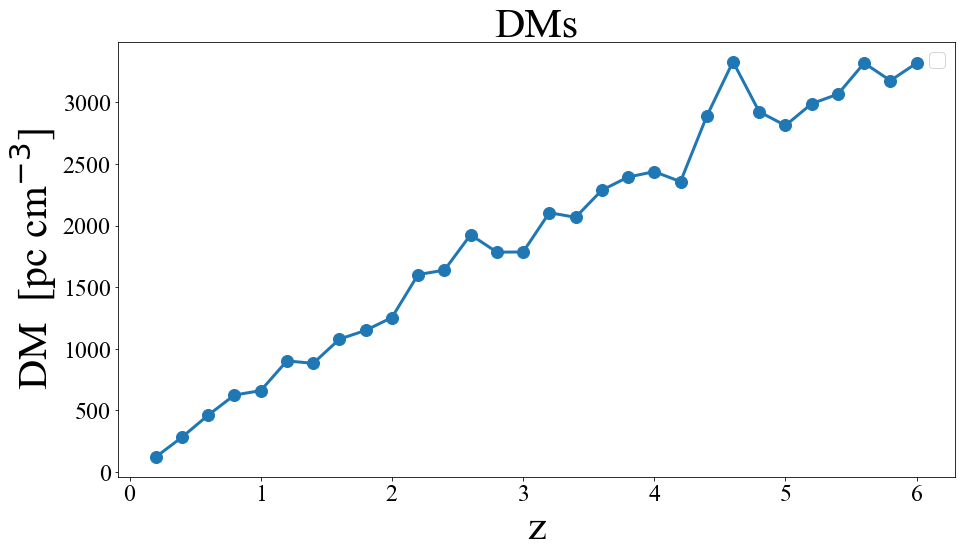

In [26]:
#plot
pl.figure(figsize = (15,8))
pl.plot(np.round(z_ends_postEoR,1), (0.01**3)*DM_field_postEoR[:,1,10,10]/(pc),  marker = 'o',markersize = 12, linewidth=3., )
pl.title(r'DMs', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.gca().invert_yaxis()
#pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()

In [6]:
#directory to get the ionization boxes (for lightcone and ionization fied and density field)
io_boxes ='/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/'
oi_boxes = '/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/beta_-1_xH_fields/'

ionization_boxes = (io_boxes, oi_boxes)
density_boxes = '/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/'


In [118]:
betas = (1, -1)
z_ends = np.linspace(0.4, 10, 49)
print(np.round(z_ends,1))
z_start = 0.2
z_end = 10
nboxes = 50
print(np.linspace(z_start,z_end,nboxes))
#z_ends = np.linspace(6.4, 8, 9)
#print(np.round(z_ends,1))
#z_start = 6.2


nboxes = 2
print(np.linspace(z_start,z_ends[0],nboxes))
density_z_beta = np.zeros((len(z_ends), len(betas)))


[ 0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.
  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8
  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6
  8.8  9.   9.2  9.4  9.6  9.8 10. ]
[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]
[0.2 0.4]


In [44]:
#make lightcone for each redshift, beta and slice

ionization_lightcones_beta_z_Dictionary = np.zeros((len(z_ends) , len(betas)) , dtype = object)
density_lightcones_beta_z_Dictionary = np.zeros((len(z_ends) , len(betas)) , dtype = object)
lightcone_redshifts_beta_z_Dictionary = np.zeros((len(z_ends) , len(betas)) , dtype = object)


for z in range(len(z_ends)):
    print('Doing z ' + str(z_ends[z]))

    
    for b in range(len(betas)):
        print('doing beta ' + str(betas[b]) )
        
        #make the lightcone for each quantity
        lightcone_Dictionary = {}
        densitylightcone_Dictionary = {}
        
        #if we wanted to change this to be the entire box, then change pixelsperslab to HII_DIM
        #and change the density method to slab = False
        for i in range(1):
            box_slice = HII_DIM - i -1
            lightcone_Dictionary[int(box_slice)] , lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_start = z_start, z_end = np.round(z_ends[z],2), N = N, nboxes = nboxes + int(z), box_slice = int(box_slice), directory =  ionization_boxes[b], return_redshifts = True )
            densitylightcone_Dictionary[int(box_slice)] = lc.lightcone(DIM = HII_DIM, z_start = z_start, z_end = np.round(z_ends[z],2), N = N, nboxes = nboxes + int(z), box_slice = int(box_slice), directory = ionization_boxes[0] , marker = 'updated_smoothed_deltax')
            
    
        ionization_lightcones_beta_z_Dictionary[z][b] = lightcone_Dictionary
        lightcone_redshifts_beta_z_Dictionary[z][b] = lightcone_redshifts
        density_lightcones_beta_z_Dictionary[z][b] = densitylightcone_Dictionary
        
    print('Done this redshift')
            


Doing z 0.4
doing beta 1
doing beta -1
Done this redshift
Doing z 0.6
doing beta 1
doing beta -1
Done this redshift
Doing z 0.8
doing beta 1
doing beta -1
Done this redshift
Doing z 1.0
doing beta 1
doing beta -1
Done this redshift
Doing z 1.2
doing beta 1
doing beta -1
Done this redshift
Doing z 1.4
doing beta 1
doing beta -1
Done this redshift
Doing z 1.6
doing beta 1
doing beta -1
Done this redshift
Doing z 1.7999999999999998
doing beta 1
doing beta -1
Done this redshift
Doing z 2.0
doing beta 1
doing beta -1
Done this redshift
Doing z 2.1999999999999997
doing beta 1
doing beta -1
Done this redshift
Doing z 2.4
doing beta 1
doing beta -1
Done this redshift
Doing z 2.5999999999999996
doing beta 1
doing beta -1
Done this redshift
Doing z 2.8
doing beta 1
doing beta -1
Done this redshift
Doing z 2.9999999999999996
doing beta 1
doing beta -1
Done this redshift
Doing z 3.1999999999999997
doing beta 1
doing beta -1
Done this redshift
Doing z 3.3999999999999995
doing beta 1
doing beta -1
D

In [9]:

#save the lightcone should something go very very wrong
np.savez('/Volumes/Tubster/Lightcone_xH_delta_increasingz.npz', xH=ionization_lightcones_beta_z_Dictionary, redshifts= lightcone_redshifts_beta_z_Dictionary, density=density_lightcones_beta_z_Dictionary)



In [ ]:
#be careful here about the lightcone, does the sharp cutoff have anythign to do with our periodicity?

#yeah below is because we have a brand new lightcone for each redshift, so we aren't scrolling through the same
#light and adding to each. There should be a single lightcone that ends at many different zs. We need to check
#whether lightcones corresponding to z and z-1 are the same array until the i + 1th point

In [57]:
#compute the DM for that slice along the line of sight

slice_of_box = 199
DM_field = np.zeros((len(z_ends), len(betas), HII_DIM, HII_DIM))

x, y = 25, 25

for z in range(len(z_ends)):
    print('doing ' + str(z))
    for b in range(len(betas)):
        #for x in range(HII_DIM):
        #    for y in range(HII_DIM):
        
        DM_field[z][b][x][y] = DM.compute_DM(x,y, ionization_lightcones_beta_z_Dictionary[z][b][slice_of_box], density_lightcones_beta_z_Dictionary[z][b][slice_of_box], lightcone_redshifts_beta_z_Dictionary[z][b])
        
        if z > 0:
            if DM_field[z][b][x][y]  < DM_field[z-1][b][x][y]:
                print('beta , z, z-1 , DM , DM -1', betas[b], z, z -1, DM_field[z][b][x][y], DM_field[z-1][b][x][y])

doing 0
doing 1
doing 2
doing 3
doing 4
doing 5
doing 6
doing 7
doing 8
('beta , z, z-1 , DM , DM -1', 1, 8, 7, 4.302228251758178e+25, 4.657955011988524e+25)
('beta , z, z-1 , DM , DM -1', -1, 8, 7, 4.302228251758178e+25, 4.657955011988524e+25)
doing 9
('beta , z, z-1 , DM , DM -1', 1, 9, 8, 4.025799400784543e+25, 4.302228251758178e+25)
('beta , z, z-1 , DM , DM -1', -1, 9, 8, 4.025799400784543e+25, 4.302228251758178e+25)
doing 10
doing 11
doing 12
doing 13
doing 14
doing 15
('beta , z, z-1 , DM , DM -1', 1, 15, 14, 5.674489180912031e+25, 7.63916148476268e+25)
('beta , z, z-1 , DM , DM -1', -1, 15, 14, 5.674489180912031e+25, 7.63916148476268e+25)
doing 16
doing 17
doing 18
('beta , z, z-1 , DM , DM -1', 1, 18, 17, 7.011002293203599e+25, 8.879652703078995e+25)
('beta , z, z-1 , DM , DM -1', -1, 18, 17, 7.011002293203599e+25, 8.879652703078995e+25)
doing 19
doing 20
('beta , z, z-1 , DM , DM -1', 1, 20, 19, 7.497505920648969e+25, 8.688901386411982e+25)
('beta , z, z-1 , DM , DM -1', -1, 

In [46]:
#average out the DM field

DM_field_avg = np.sum(np.sum(DM_field, axis = 2), axis = 2)



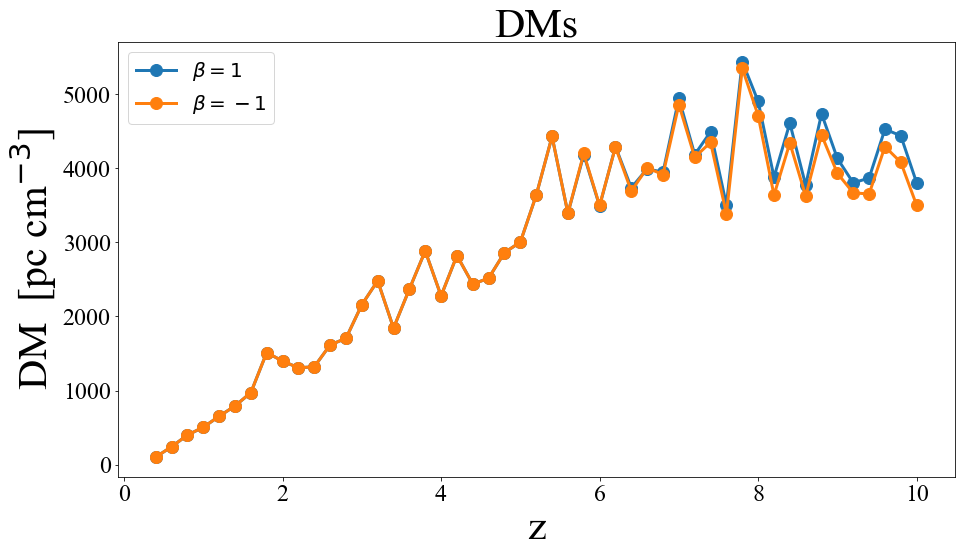

In [47]:
#plot

pl.figure(figsize = (15,8))
for b in range(len(betas)):
    pl.plot(np.round(z_ends,1), (0.01**3)*DM_field_avg[:,b]/(pc),  marker = 'o',markersize = 12, linewidth=3., label = r'$\beta = {}$' .format(betas[b]))

pl.title(r'DMs', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.gca().invert_yaxis()
#pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()

In [ ]:
#I guess the speed at which it continues going up will give a clue to how fast EoR is unfolding at the end 
#check the max DM fluctuation after EoR, and put upper limit constraints

#we'll have to average these results somehow (across different line of sights)

#we're basically just looking to do inference on DM distributions


#ask Webin, what errors bars to assume for a potential forcast like that?

#Need to get the probability distribution at each z. Is this the sigma^2 that everybody else did?

#think about how this method is advantageous over 21cm or ly a and then combine?

In [16]:
zeross = ionization_lightcones_beta_z_Dictionary[0][0][199][ionization_lightcones_beta_z_Dictionary[0][0][199]<0]


TypeError: Invalid dimensions for image data

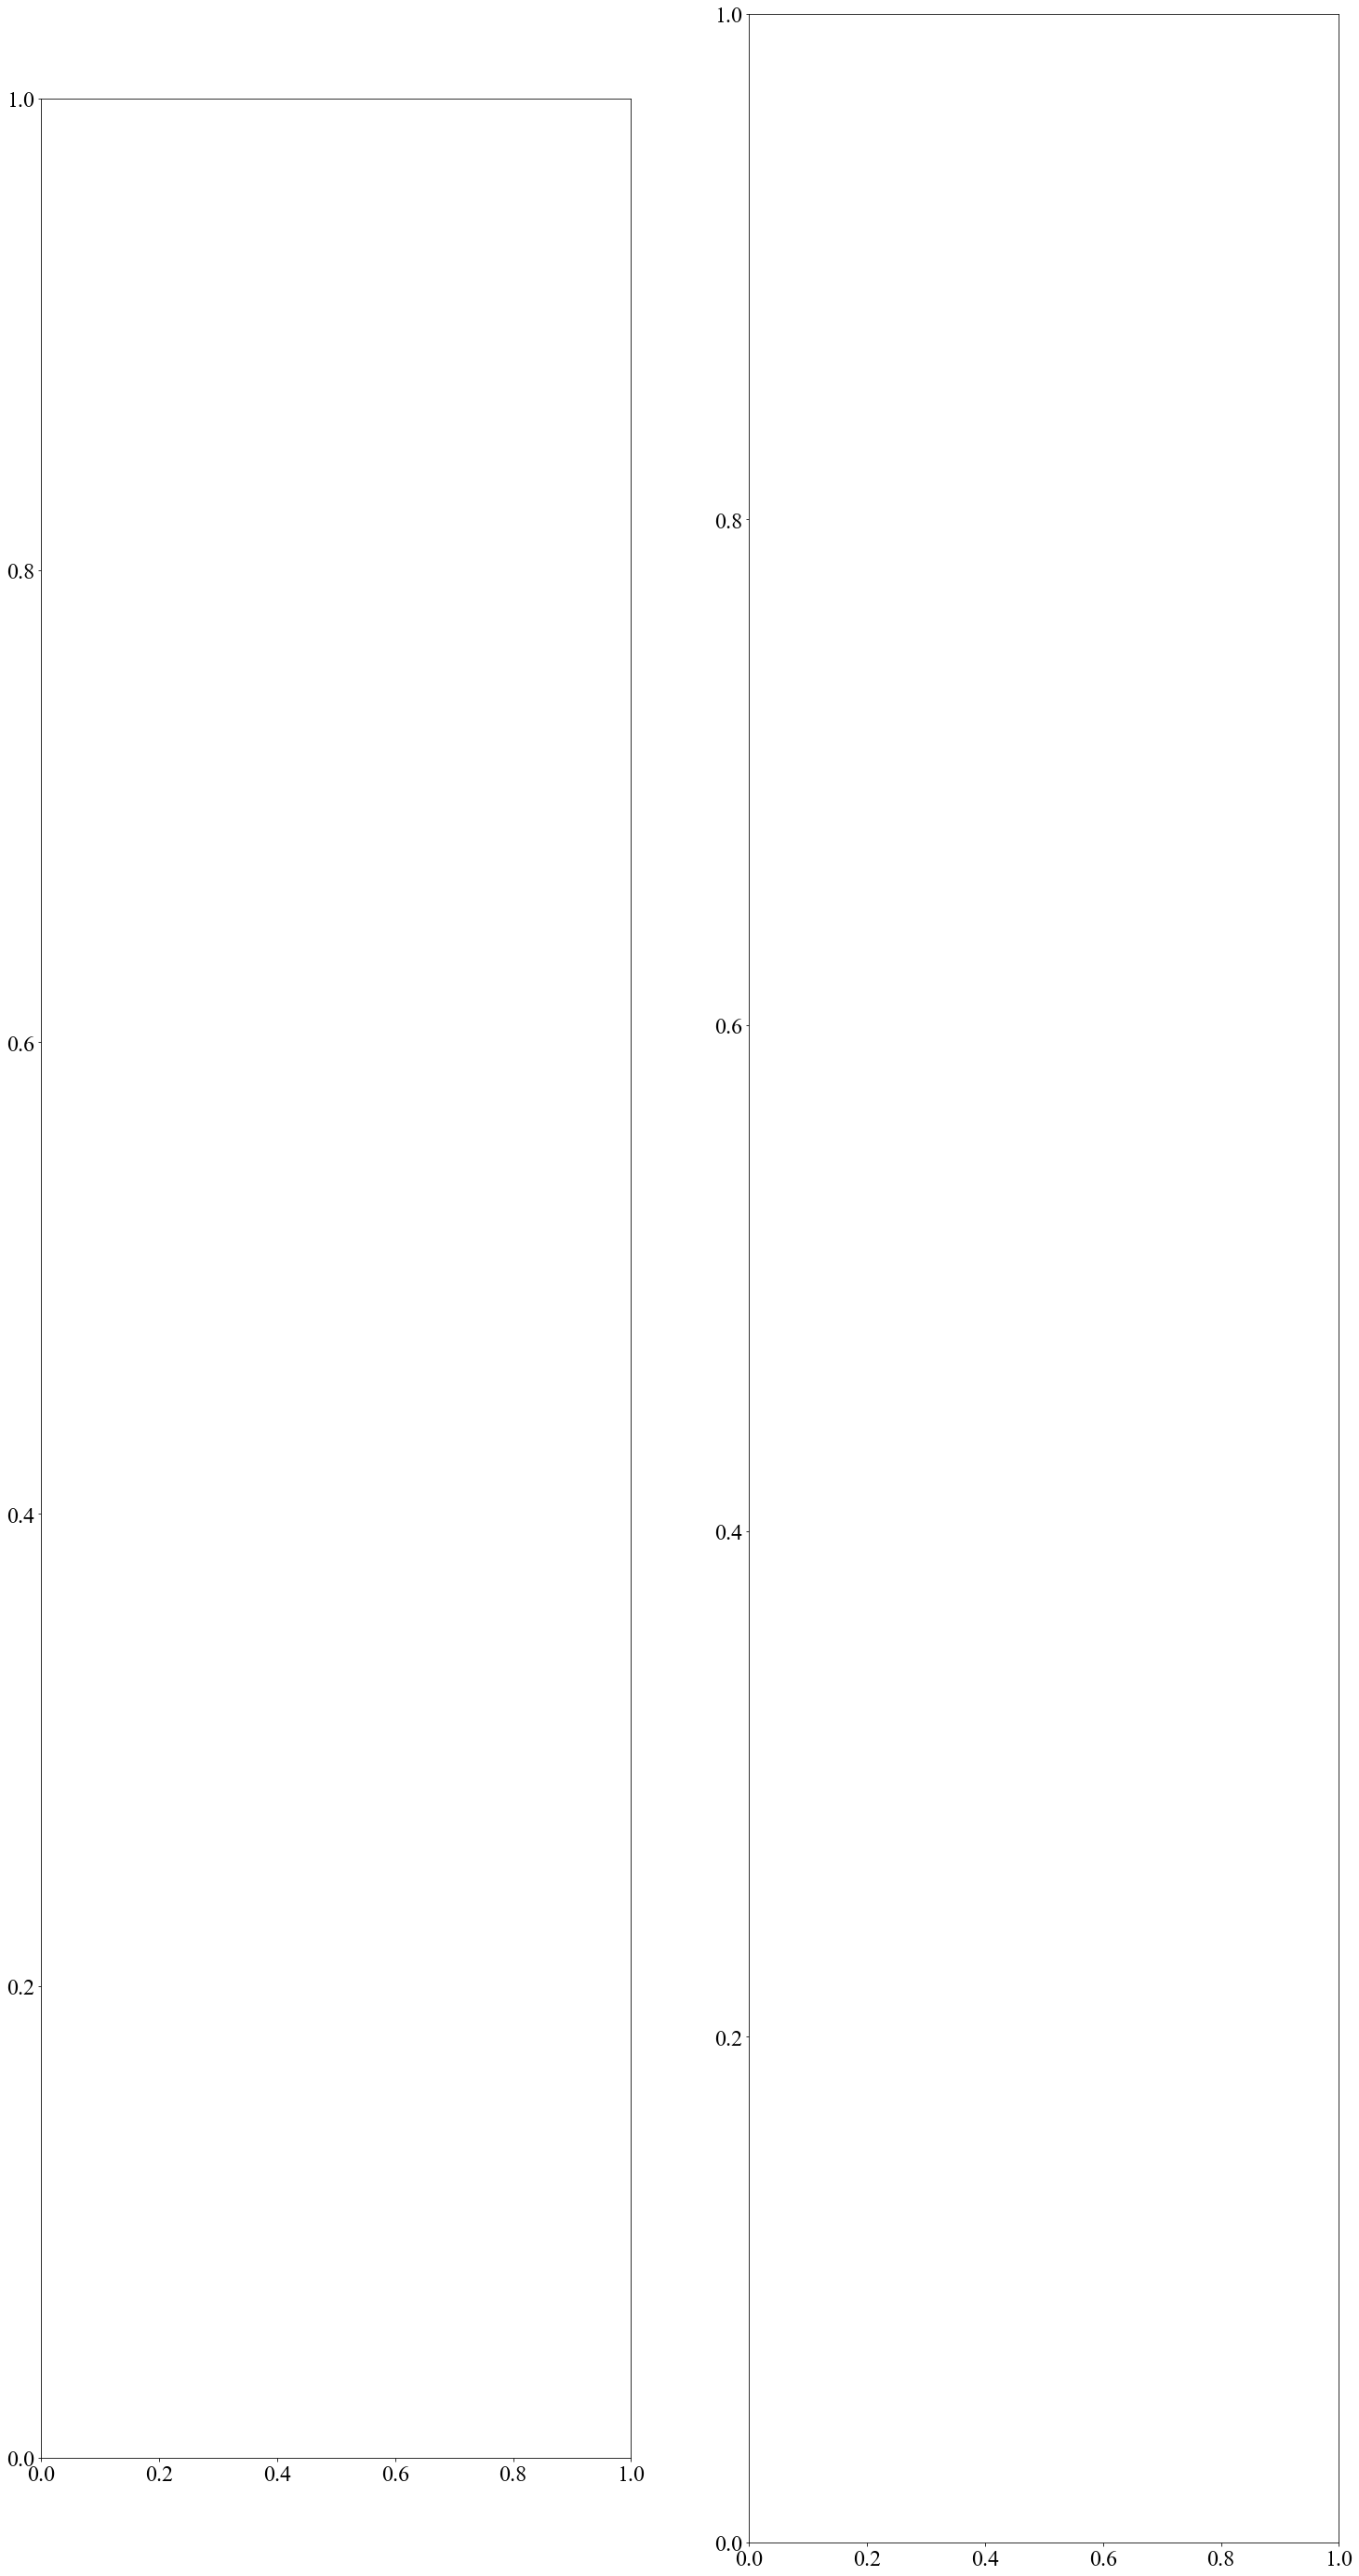

In [102]:

fig, (ax1, ax2) = pl.subplots(1, 2)
fig.set_figheight(50)
fig.set_figwidth(25)
ax1.imshow(ionization_lightcones_beta_z_Dictionary[48][0][199][0:,:,], aspect = 4)
ax2.imshow(ionization_lightcones_beta_z_Dictionary[47][0][199][0:,:,], aspect = 4)
y_positions = np.arange(0,lightcone_redshifts.shape[0],10)
ax1.set_yticklabels(y_positions, np.round(lightcone_redshifts[::10],2))
ax2.set_yticklabels(y_positions, np.round(lightcone_redshifts[::10],2))


pl.show()
pl.close()


In [114]:
print(ionization_lightcones_beta_z_Dictionary[48][0][199][200][0])
print(ionization_lightcones_beta_z_Dictionary[47][0][199][200][0])

#because they are all 250 pixels and the redshift spacing is different for all of them :(


[1.         0.96150529 0.98859781 1.         1.         1.
 0.66671371 0.83972126 0.97254056 0.55257183 0.85812724 0.90584654
 0.89893788 0.24123789 0.         0.98247445 0.88298202 0.95136893
 0.97245485 0.87116832 0.54654473 0.85419667 0.67701018 0.87002051
 0.98189348 0.91218686 0.96851951 0.98541272 0.95150942 0.88845754
 0.63485175 0.58877057 0.89709896 0.93075633 0.97747087 0.89221966
 0.8063072  0.74318177 0.57734966 0.8854807  0.98345006 0.95967668
 0.         0.34661415 1.         0.35742971 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.33681369 0.2681942  0.80200595
 0.33134177 0.80242747 0.30617991 0.93561953 0.32825533 0.
 0.         0.         0.         0.         0.83598584 0.95241773
 0.78159255 0.97442716 0.96577084 0.8929593  0.5822897  0.95402098
 1.         0.95918226 0.9581427  0.9787429  1.         1.
 0.55806029 0.49259326 0.90877336 0.9778720

In [164]:
pl.figure(figsize = (20,20))
pl.imshow(ionization_lightcones_beta_z_Dictionary[0][0][199][:,:,0], aspect = 4, vmin= 0.1, vmax = 0.9)
y_positions = np.arange(0,lightcone_redshifts.shape[0],10)
pl.yticks(y_positions, np.round(lightcone_redshifts[::10],2))
pl.show()
pl.close()



KeyError: 0

<Figure size 1440x1440 with 0 Axes>

In [ ]:
pl.imshow(ionization_lightcones_beta_z_Dictionary[47][0][199][:,:,0], aspect = 4, cmap='Reds')
x = np.arange(80,122,2) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 7 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x] # labels you want to see
plt.xticks(x_positions, x_labels)

In [119]:
betas = (1, -1)
z_ends = np.linspace(0.4, 10, 49)
print(np.round(z_ends,1))
z_start = 0.2
z_end = 10
nboxes = 50
print(np.linspace(z_start,z_end,nboxes))

density_z_beta = np.zeros((len(betas)))

[ 0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.
  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8
  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6
  8.8  9.   9.2  9.4  9.6  9.8 10. ]
[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]


In [120]:
#make lightcone for each redshift, beta and slice

ionization_lightcones_beta_z_Dictionary = np.zeros((len(betas)) , dtype = object)
density_lightcones_beta_z_Dictionary = np.zeros((len(betas)) , dtype = object)
lightcone_redshifts_beta_z_Dictionary = np.zeros((len(betas)) , dtype = object)



for b in range(len(betas)):
    print('doing beta ' + str(betas[b]) )
        
    #make the lightcone for each quantity
    lightcone_Dictionary = {}
    densitylightcone_Dictionary = {}
        
    #if we wanted to change this to be the entire box, then change pixelsperslab to HII_DIM
    #and change the density method to slab = False
    for i in range(1):
        box_slice = HII_DIM - i -1
        lightcone_Dictionary[int(box_slice)] , lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_start = z_start, z_end = z_end, N = N, nboxes = nboxes, box_slice = int(box_slice), directory =  ionization_boxes[b], return_redshifts = True )
        densitylightcone_Dictionary[int(box_slice)] = lc.lightcone(DIM = HII_DIM, z_start = z_start, z_end = z_end, N = N, nboxes = nboxes, box_slice = int(box_slice), directory = ionization_boxes[0] , marker = 'updated_smoothed_deltax')
            
    ionization_lightcones_beta_z_Dictionary[b] = lightcone_Dictionary
    lightcone_redshifts_beta_z_Dictionary[b] = lightcone_redshifts
    density_lightcones_beta_z_Dictionary[b] = densitylightcone_Dictionary
        
    print('Done this redshift')
            


doing beta 1
Done this redshift
doing beta -1
Done this redshift


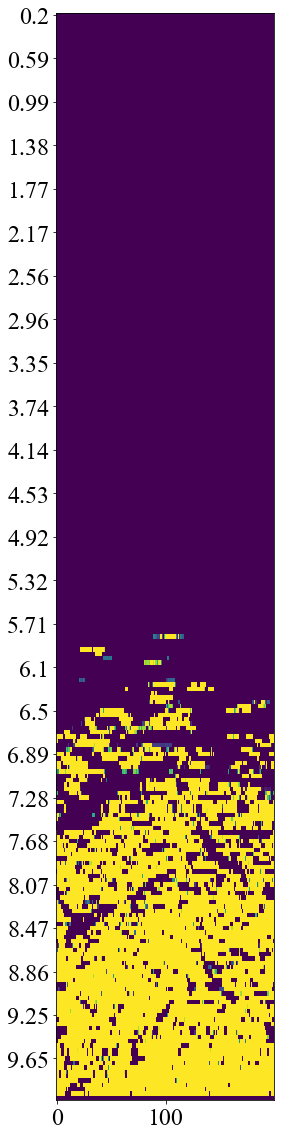

In [167]:
pl.figure(figsize = (20,20))
pl.imshow(ionization_lightcones_beta_z_Dictionary[0][199][:,:,0], aspect = 4, vmin = 0, vmax = 0.3)
y_positions = np.arange(0,lightcone_redshifts.shape[0],10)
pl.yticks(y_positions, np.round(lightcone_redshifts[::10],2))
pl.show()
pl.close()


In [160]:
#compute the DM for that slice along the line of sight
import DM2 as DM2
slice_of_box = 199
DM_field_singlelos = np.zeros((len(z_ends), len(betas), HII_DIM, HII_DIM))

x, y = 135, 135

z_ends = np.linspace(0.4, 10, 50)
for z in range(len(z_ends)):
    print('doing ' + str(z))
    for b in range(len(betas)):
        
        x, y = 135, 135
        
        
        #for x in range(HII_DIM):
        #    for y in range(HII_DIM):
        
        DM_field_singlelos[z][b][x][y] = DM2.compute_DM(x,y, ionization_lightcones_beta_z_Dictionary[b][slice_of_box], density_lightcones_beta_z_Dictionary[b][slice_of_box], lightcone_redshifts_beta_z_Dictionary[b], z_end = z_ends[z])
        
        if z > 0:
            if DM_field[z][b][x][y]  < DM_field[z-1][b][x][y]:
                print('beta , z, z-1 , DM , DM -1', betas[b], z, z -1, DM_field[z][b][x][y], DM_field[z-1][b][x][y])

                
                
                
                

doing 0
doing 1
doing 2
doing 3
doing 4
doing 5
doing 6
doing 7
doing 8
doing 9
doing 10
doing 11
doing 12
doing 13
doing 14
doing 15
doing 16
doing 17
doing 18
doing 19
doing 20
doing 21
doing 22
doing 23
doing 24
doing 25
doing 26
doing 27
doing 28
doing 29
doing 30
doing 31
doing 32
doing 33
doing 34
doing 35
doing 36
doing 37
doing 38
doing 39
doing 40
doing 41
doing 42
doing 43
doing 44
doing 45
doing 46
doing 47
doing 48
doing 49


In [138]:
#average out the DM field

DM_field_avg = np.sum(np.sum(DM_field, axis = 2), axis = 2)


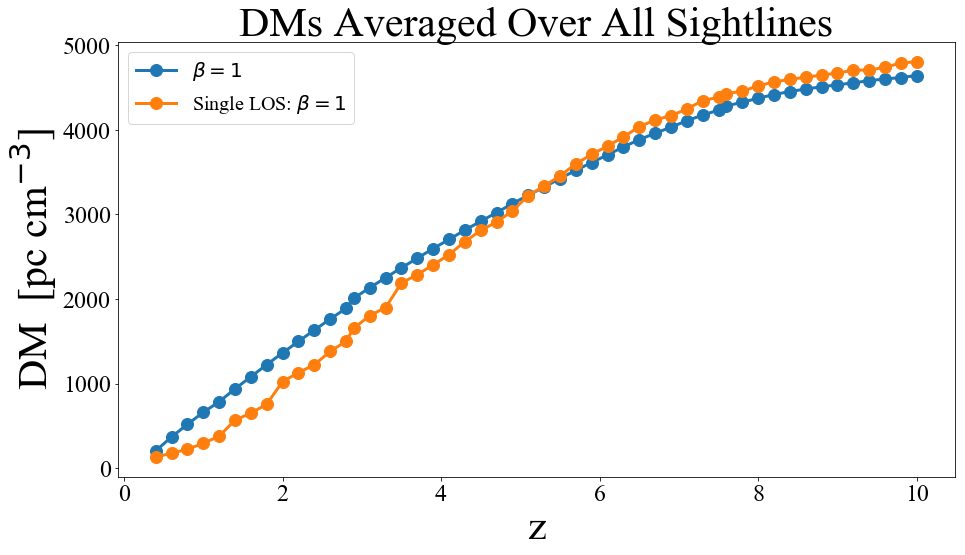

In [162]:
#plot

pl.figure(figsize = (15,8))
for b in range(len(betas)):
    if b > 0:
        continue
    pl.plot(np.round(z_ends,1), (0.01**3)*DM_field_avg[:,b]/(HII_DIM*HII_DIM*pc),  marker = 'o',markersize = 12, linewidth=3., label = r'$\beta = {}$' .format(betas[b]))
    pl.plot(np.round(z_ends,1), (0.01**3)*DM_field_singlelos[:,b,x,y]/(pc),  marker = 'o',markersize = 12, linewidth=3., label = r'Single LOS: $\beta = {}$' .format(betas[b]))
    
pl.title(r'DMs Averaged Over All Sightlines', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.gca().invert_yaxis()
#pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()

In [145]:

#save the average sightlines
np.savez('/Users/michael/Research/FRB/DMs_avg_all_sightlines.npz', lc_density = density_lightcones_beta_z_Dictionary, lc_redshifts = lightcone_redshifts_beta_z_Dictionary,  xH_lc = ionization_lightcones_beta_z_Dictionary , z_range= np.round(z_ends,1), DM_avg = (0.01**3)*DM_field_avg[:,b]/(HII_DIM*HII_DIM*pc), betas = betas, DM_field = DM_field)


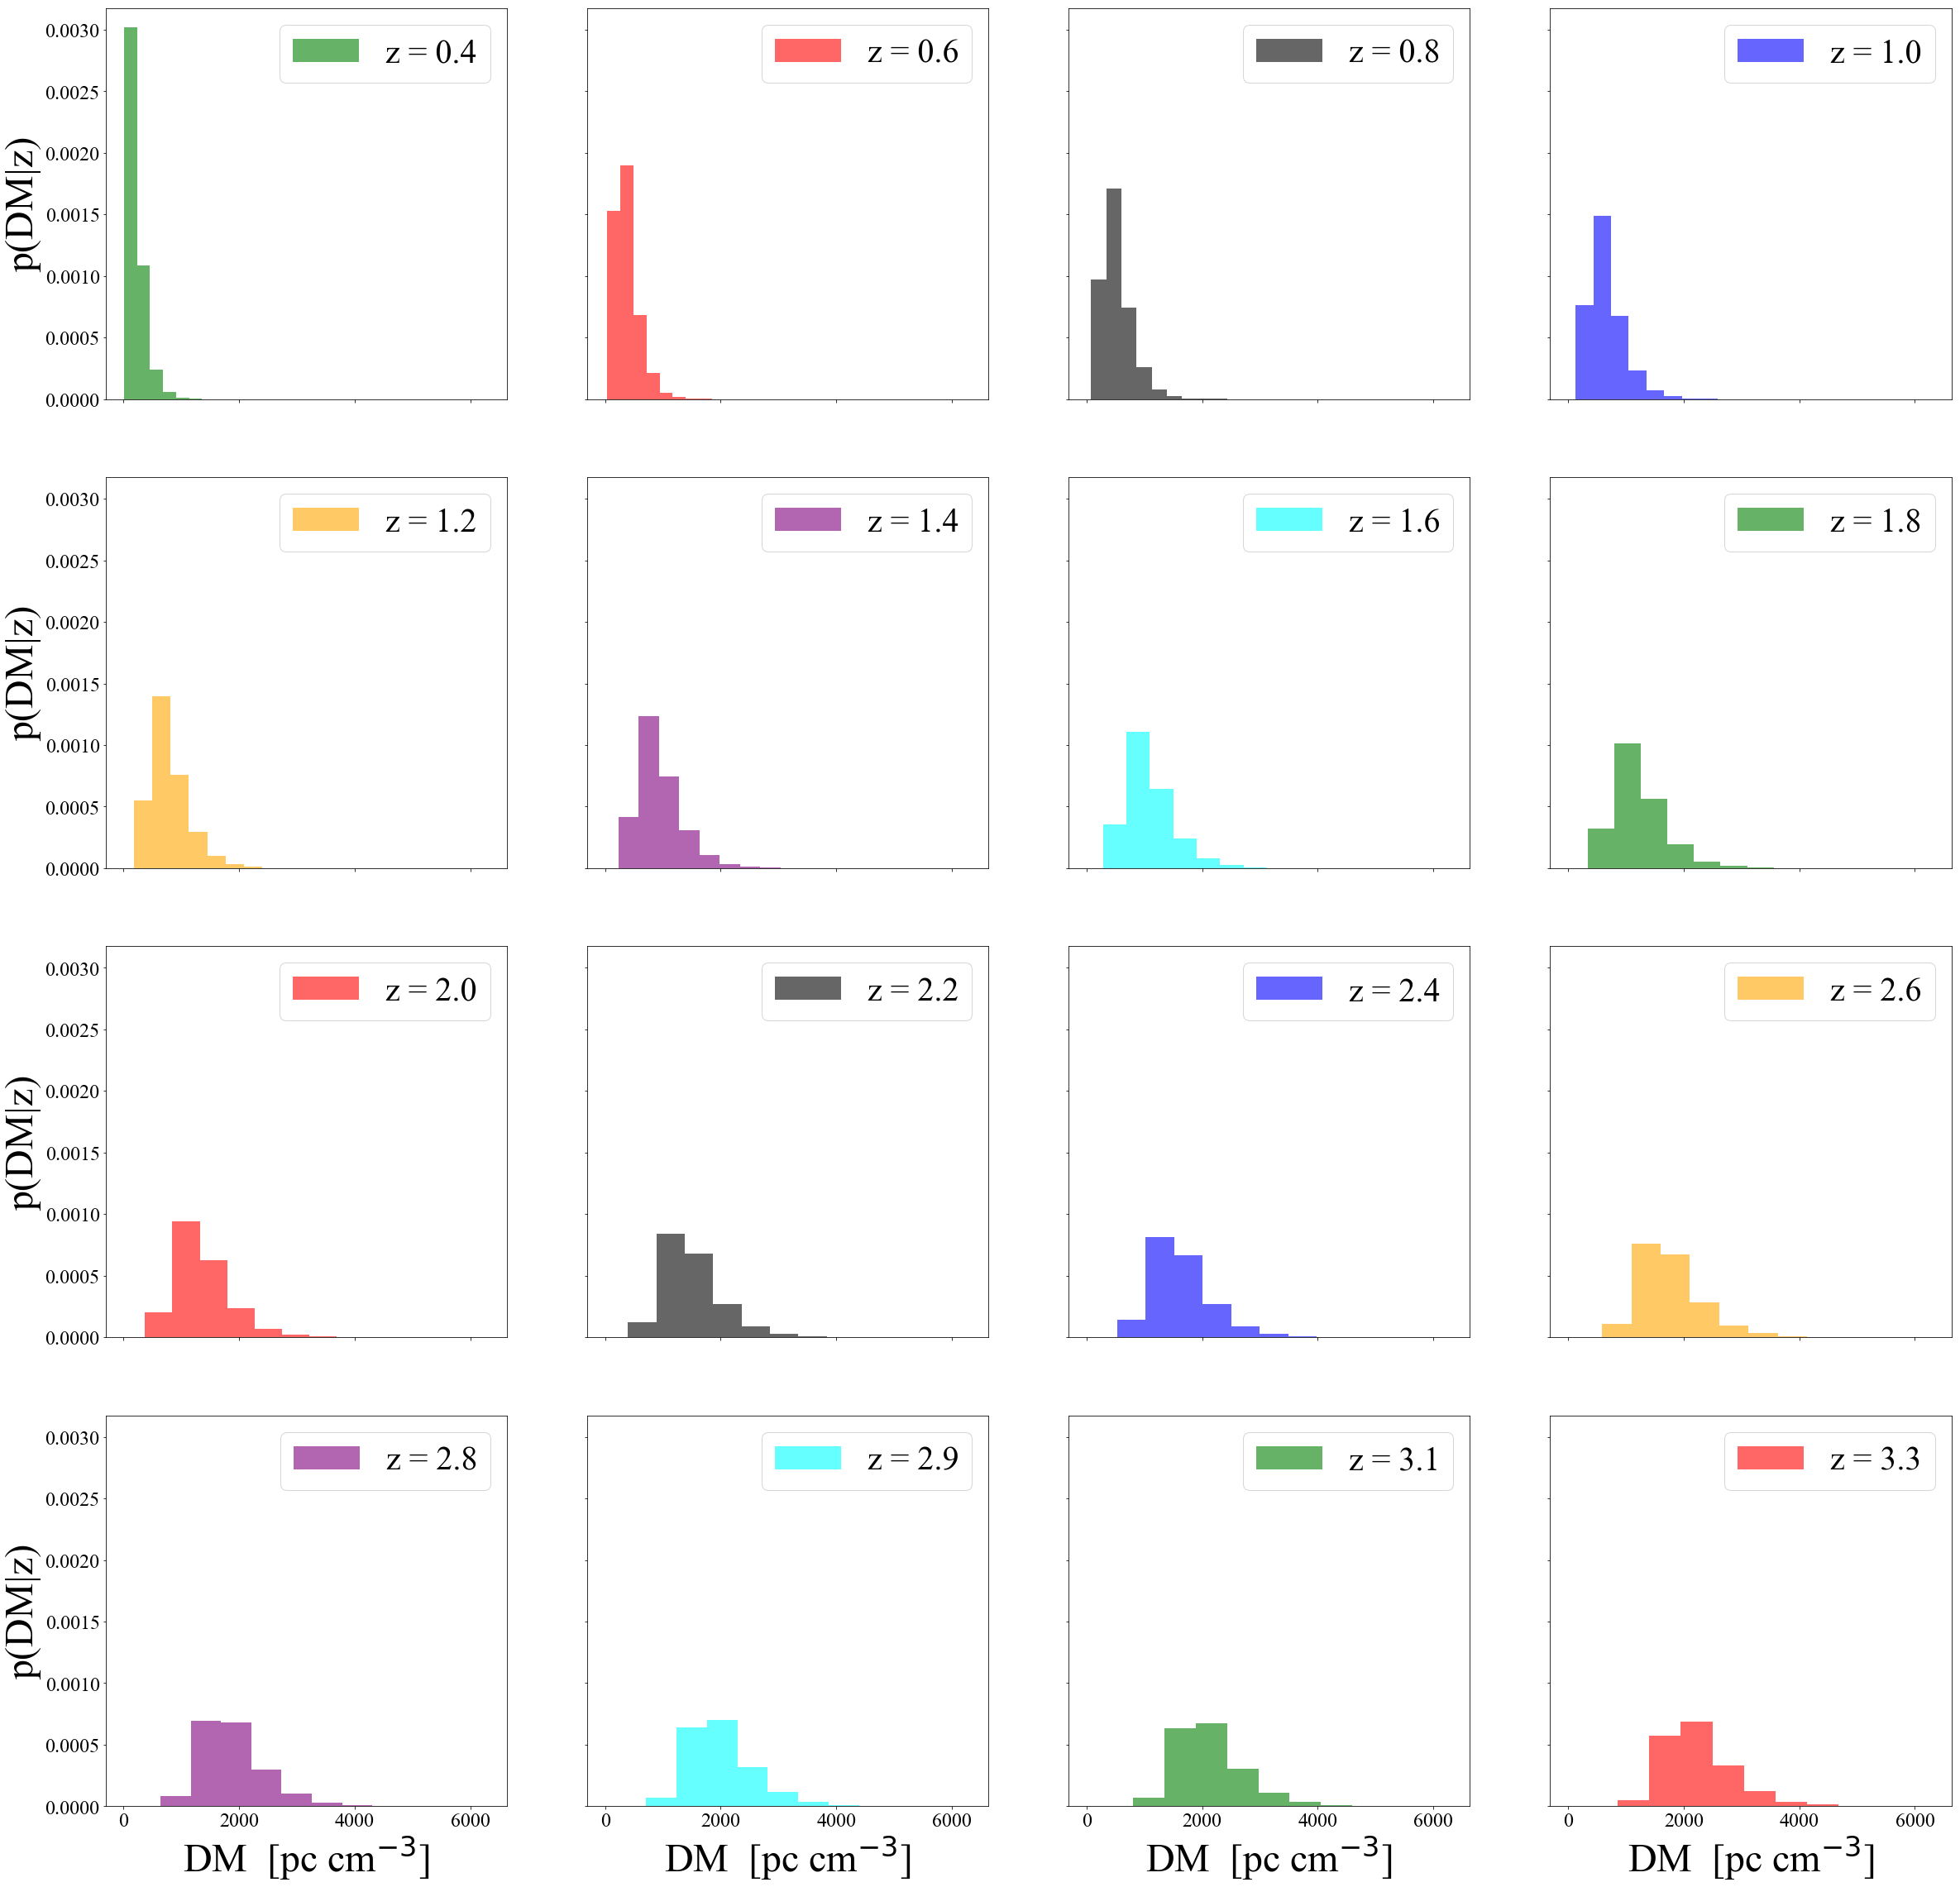

In [228]:
#this cell takes the array of all DM LoS and flattens them into a signle shape in order to plot the prob density 
#function. Do this for each z, beta realization
DMs_z_beta_allLoS = np.zeros((DM_field.shape[0], DM_field.shape[1], HII_DIM*HII_DIM))
for z in range(DM_field.shape[0]):
    for b in range(DM_field.shape[1]):
        DMs_z_beta_allLoS[z][b] = DM_field[z][b].flatten()
        

colors = ('Green', 'Red', 'Black', 'Blue', 'Orange', 'Purple', 'Cyan')
x_loc, y_loc = 0,0
y_dim, x_dim = 4, 4
num_elem = 16
f, axarr = pl.subplots(y_dim,x_dim,figsize=(40, 40), sharex = True , sharey= True)
#f.tight_layout(pad=10.0)
for i in range(num_elem ):
    if i < num_elem/4.:
        x_loc, y_loc = i, 0
    if num_elem/4. <= i < num_elem/2.:
        x_loc, y_loc = i%4, 1
    if num_elem/2. <= i < 3*num_elem/4.:
        x_loc, y_loc = i%4, 2
    if 3*num_elem/4. <= i < num_elem :
        x_loc, y_loc = i%4, 3
        axarr[y_loc, x_loc].set_xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
        
    axarr[y_loc, 0].set_ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
       
    axarr[y_loc, x_loc].hist((0.01**3)*DMs_z_beta_allLoS[i][0]/(pc),  alpha = 0.6, color = colors[i%len(colors)], label =  str(r'z = {}' .format(np.round(z_ends[i],1))), density = True)
    axarr[y_loc, x_loc].legend(prop={'size': 40})
pl.show()
pl.close()


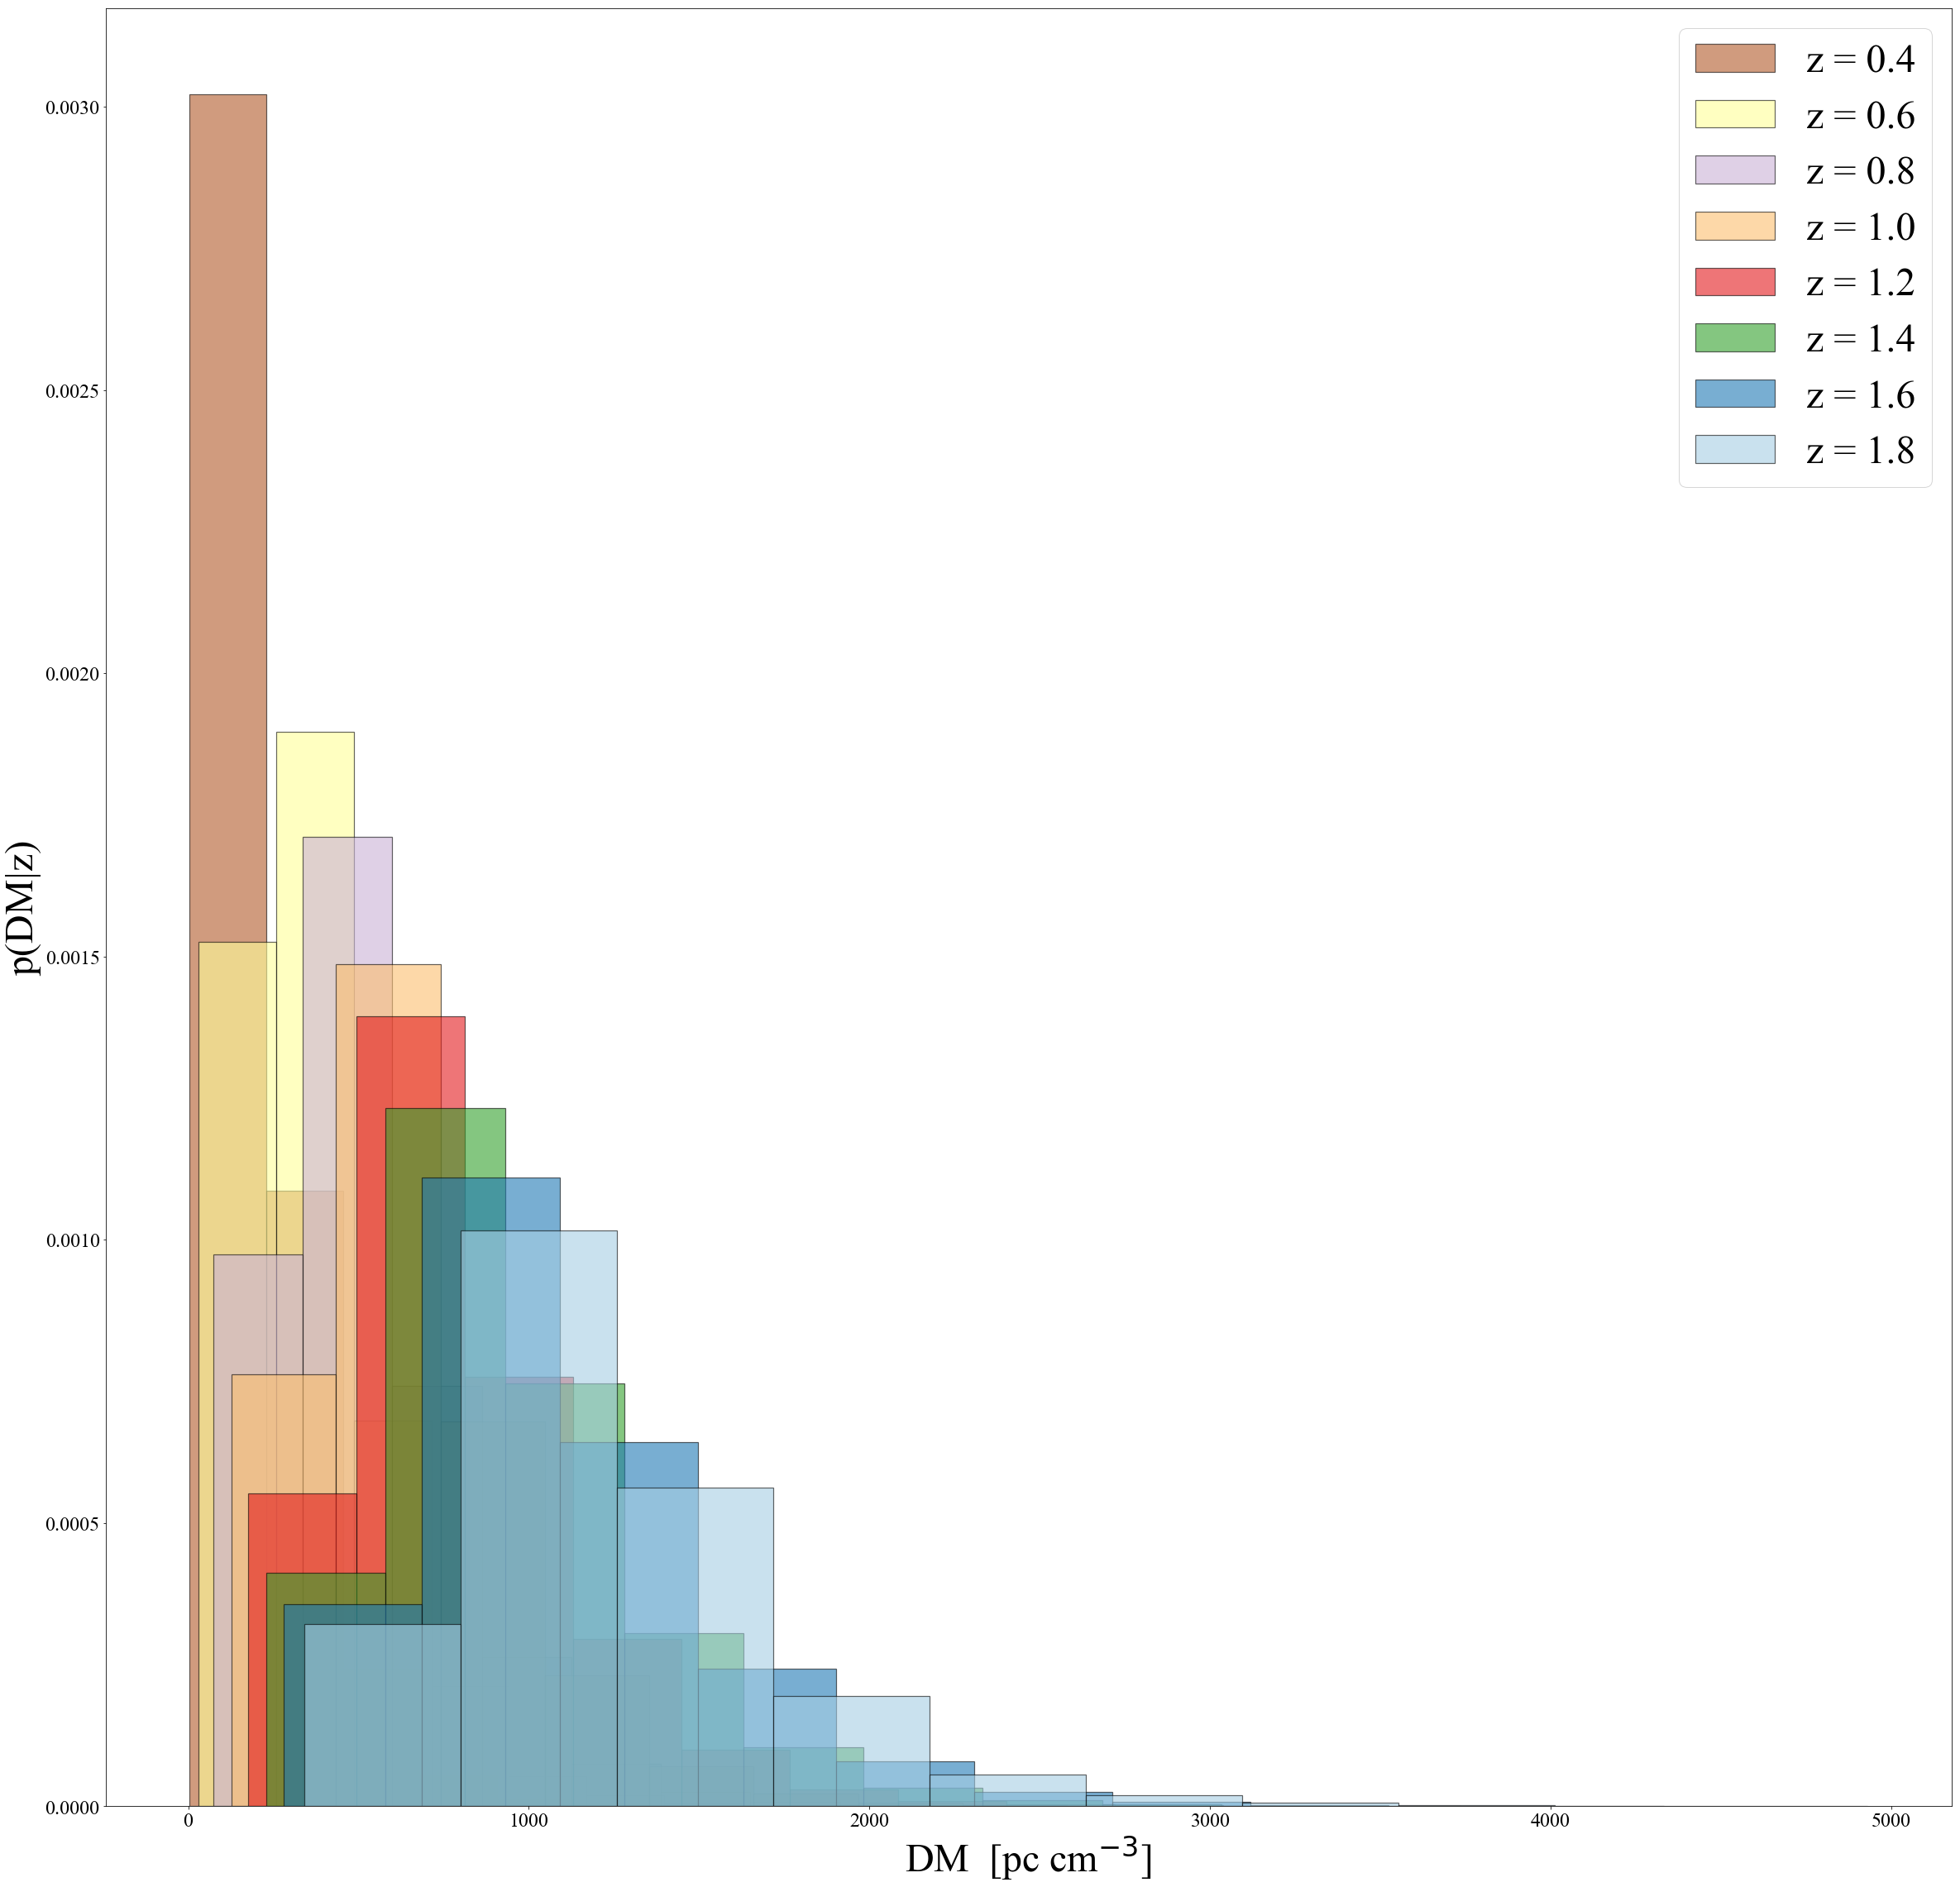

In [242]:
#this cell is same as above, just a different way of displaying them
num_elem = 8
from matplotlib import cm
start = 0.0
stop = 1
number_of_lines = num_elem
cm_subsection = np.linspace(start, stop, number_of_lines) 
cmap = pl.cm.Paired
cmap = cmap.reversed(pl.cm.Paired)
colors = [ cmap(x) for x in cm_subsection ]

DMs_z_beta_allLoS = np.zeros((DM_field.shape[0], DM_field.shape[1], HII_DIM*HII_DIM))
for z in range(DM_field.shape[0]):
    for b in range(DM_field.shape[1]):
        DMs_z_beta_allLoS[z][b] = DM_field[z][b].flatten()
        

pl.figure(figsize=(40, 40))
#f.tight_layout(pad=10.0)
for i in range(num_elem):
    pl.hist((0.01**3)*DMs_z_beta_allLoS[i][0]/(pc),  alpha = 0.6, color = colors[i%len(colors)], label =  str(r'z = {}' .format(np.round(z_ends[i],1))),edgecolor='black', linewidth=1.2, density = True)

pl.xlabel(r'DM  [pc cm$^{-3}$]',  fontsize = 48)
pl.legend(prop={'size': 48})
pl.ylabel(r'p(DM|z)', x = -4.5 , fontsize = 48)
pl.show()
pl.close()

